In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# 读取数据,删除前两列
data = pd.read_csv('anadatavfa.csv')
data.drop(['DATE','TIME'], axis=1, inplace=True)


In [4]:

print(data.shape)
print("DATA INPUT ARE:\n",data.iloc[:2, :15])
print("DATA OUTPUT ARE:\n",data.iloc[:2,15])

#print the 16&17 column head
#print("COLUMN 16 ARE:\n",data.iloc[:2,16])
#print("COLUMN 17 ARE:\n",data.iloc[:2,17])


(730, 23)
DATA INPUT ARE:
     PH  COND    TAC  TH   COD    OIL    SS  SO42-   CL-  NH4-N    TP    TN  \
0  6.9  3487  184.0  22  9200  169.9  35.0  4.999  60.0  37.93  3.96  92.0   
1  6.7  3473  135.0  38  7475  176.0  76.0  5.000  84.3  34.41  3.94  95.0   

      VFA   B-Q  B-RECY  
0  2224.8  90.0     630  
1  2212.3  80.0     630  
DATA OUTPUT ARE:
 0    582.1
1    584.6
Name: B-VFA, dtype: float64


In [5]:

#delete the rows if data is missing
data = data.dropna(axis=0,how='any')

#pretreat the data with Z-score

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data.iloc[:,:15] = scaler.fit_transform(data.iloc[:,:15])

print("DATA INPUT ARE:\n",data.iloc[:2, :15])
print("DATA OUTPUT ARE:\n",data.iloc[:2,15])


DATA INPUT ARE:
          PH      COND       TAC        TH       COD       OIL        SS  \
0 -0.484082 -0.411910 -1.388239 -0.932082  1.484707  0.642252 -1.227536   
1 -0.847081 -0.419311 -1.580110 -0.802458  0.497775  0.724751 -0.147023   

      SO42-       CL-     NH4-N        TP        TN       VFA       B-Q  \
0 -0.759425 -0.948810 -0.351259 -1.348394  0.799956  1.211175  0.792488   
1 -0.759423 -0.839179 -0.485740 -1.351194  0.916152  1.181709  0.457641   

     B-RECY  
0  1.178453  
1  1.178453  
DATA OUTPUT ARE:
 0    582.1
1    584.6
Name: B-VFA, dtype: float64


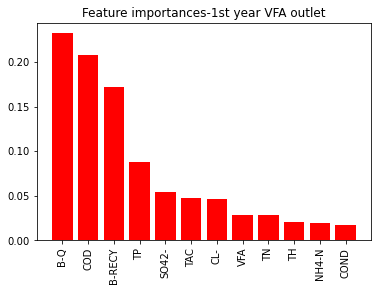

In [6]:

##############################FIRST year###########################################
# 建立模型
model = RandomForestRegressor()
model.fit(data.iloc[:365, :15],data.iloc[:365, 15])

# 计算特征贡献度
importances = model.feature_importances_

# 将特征重要性排序
indices = np.argsort(importances)[::-1]

# 找出贡献度最高的12个特征
top_k = 12
top_features = [data.columns[i] for i in indices[:top_k]]
#print(top_features)

# 画出特征重要性图
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances-1st year VFA outlet")
plt.bar(range(top_k), importances[indices[:top_k]], color="r", align="center")
plt.xticks(range(top_k), top_features, rotation=90)
plt.xlim([-1, top_k])
plt.show()

##############################FIRST year###########################################



In [ ]:
##############################sencond year###########################################
# 建立模型
model = RandomForestRegressor()
model.fit(data.iloc[365:730, :15],data.iloc[365:730, 15])

# 计算特征贡献度
importances = model.feature_importances_

# 将特征重要性排序
indices = np.argsort(importances)[::-1]

# 找出贡献度最高的12个特征
top_k = 12
top_features = [data.columns[i] for i in indices[:top_k]]
#print(top_features)

# 画出特征重要性图
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances-2nd year VFA outlet")
plt.bar(range(top_k), importances[indices[:top_k]], color="r", align="center")
plt.xticks(range(top_k), top_features, rotation=90)
plt.xlim([-1, top_k])
plt.show()

##############################sencond year###########################################



In [ ]:
##############################2 years###########################################
# 建立模型
model = RandomForestRegressor()
model.fit(data.iloc[:730, :15],data.iloc[:730, 15])

# 计算特征贡献度
importances = model.feature_importances_

# 将特征重要性排序
indices = np.argsort(importances)[::-1]

# 找出贡献度最高的12个特征
top_k = 12
top_features = [data.columns[i] for i in indices[:top_k]]
#print(top_features)

# 画出特征重要性图
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances-2 years VFA outlet")
plt.bar(range(top_k), importances[indices[:top_k]], color="r", align="center")
plt.xticks(range(top_k), top_features, rotation=90)
plt.xlim([-1, top_k])
plt.show()

##############################2 years###########################################